# NumPy Basics:

In [6]:
import numpy as np

# Create arrays
a = np.array([1, 2, 3, 4, 5])
b = np.linspace(0, 10, 5)  # Evenly spaced numbers


In [7]:
a

array([1, 2, 3, 4, 5])

In [8]:
b

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

# Array operations

In [9]:
sum_ab = a + b
dot_product = np.dot(a, b)


In [10]:
sum_ab

array([ 1. ,  4.5,  8. , 11.5, 15. ])

In [11]:
dot_product

np.float64(100.0)

# Matrix operations (e.g., computes the inverse of a matrix A)

In [13]:
A = np.array([[1, 2], [3, 4]])
inv_A = np.linalg.inv(A)
inv_A

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

### 🧮 Example 1: Calculate the following integration

$$
\int_0^1 x^2 dx
$$


In [14]:
from scipy.integrate import quad

def f(x):
    return x**2

result, error = quad(f, 0, 1)
print("∫₀¹ x² dx =", result)

∫₀¹ x² dx = 0.33333333333333337


### 🧮 Example 2:
Use scipy.optimize to determine the angle that gives the maximum range for a projectile launched with a fixed initial speed (e.g., v0 = 20 m/s).

### Physics Recap:
- Horizontal range of a projectile (no air resistance):

$$
  R(\theta) = \frac{v_0^2 \sin(2\theta)}{g}
$$

- Gravitational acceleration:

$$
  g = 9.81 \, \text{m/s}^2
$$

---


### 1. Implement the range function:

Use NumPy to define the range as a function of the angle (in radians).


In [15]:
import numpy as np

v0 = 20  # m/s
g = 9.81  # m/s^2

def projectile_range(theta):
    return (v0**2 * np.sin(2 * theta)) / g

### 2. Use `scipy.optimize` to find the angle that **maximizes the range**.

In [16]:
from scipy.optimize import minimize_scalar

result = minimize_scalar(
    lambda theta: -projectile_range(theta),
    bounds=(0, np.pi / 2),
    method='bounded'
)

# Extract results

In [17]:

optimal_theta_rad = result.x
optimal_range = projectile_range(optimal_theta_rad)
optimal_theta_deg = np.degrees(optimal_theta_rad)


# Print results

In [18]:

print(f"Optimal launch angle: {optimal_theta_deg:.2f} degrees")
print(f"Maximum range: {optimal_range:.2f} meters")


Optimal launch angle: 45.00 degrees
Maximum range: 40.77 meters


## 📈 Plotting Range vs. Angle
# Create angle values from 0 to 90 degrees

In [19]:
angles_deg = np.linspace(0, 90, 500)
angles_rad = np.radians(angles_deg)


# Compute range for each angle


In [20]:
ranges = projectile_range(angles_rad)

# Plot

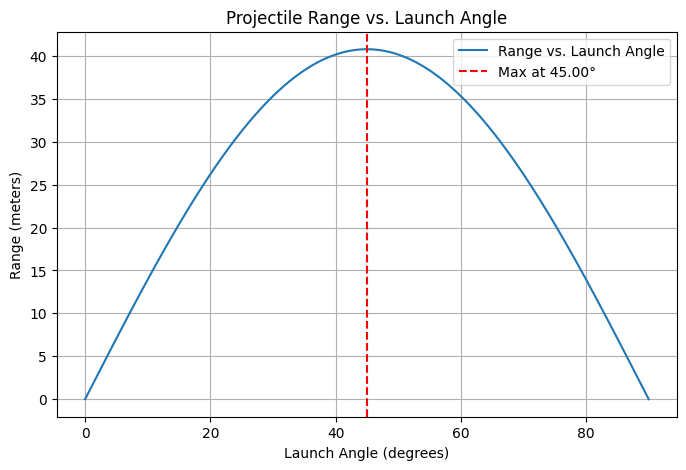

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(angles_deg, ranges, label='Range vs. Launch Angle')
plt.axvline(optimal_theta_deg, color='red', linestyle='--', label=f'Max at {optimal_theta_deg:.2f}°')
plt.title("Projectile Range vs. Launch Angle")
plt.xlabel("Launch Angle (degrees)")
plt.ylabel("Range (meters)")
plt.grid(True)
plt.legend()
plt.show()

## 🚀 Part 4: Hands-on Simulation – Motion Under Gravity

### 🎯 Objective:
Numerically simulate an object falling under gravity using **Euler's method**.


---

### 🧠 Physics Recap:

- Gravitational acceleration:  

  $$
  g = 9.81 \ \text{m/s}^2
  $$

- Velocity as a function of time:
  $$
  v(t) = v_0 + g \cdot t
  $$

- Position as a function of time:
  $$
  y(t) = y_0 + v_0 \cdot t + \frac{1}{2} g \cdot t^2
  $$

---


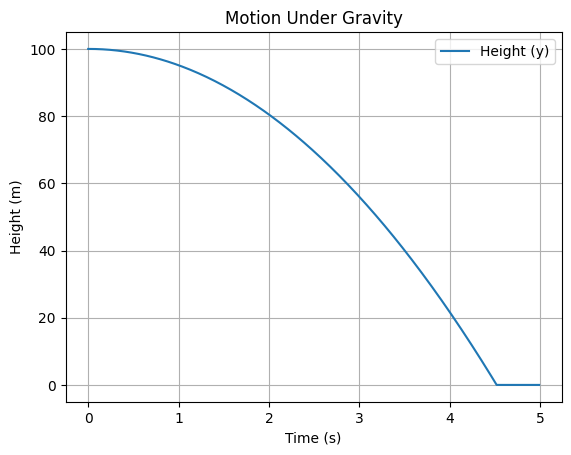

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
y0 = 100.0   # Initial height (meters)
v0 = 0.0     # Initial velocity (m/s)
g = -9.81    # Gravity (m/s²)

dt = 0.01    # Time step (s)
t_max = 5    # Max simulation time (s)

# Time array
t = np.arange(0, t_max, dt)
n = len(t)

# Initialize arrays
y = np.zeros(n)
v = np.zeros(n)

y[0] = y0
v[0] = v0

# Euler integration
for i in range(1, n):
    v[i] = v[i-1] + g * dt
    y[i] = y[i-1] + v[i-1] * dt
    if y[i] < 0:
        y[i:] = 0
        break

# Plot results
plt.plot(t, y, label='Height (y)')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Motion Under Gravity')
plt.grid(True)
plt.legend()
plt.show()

# Bonus Homework – Simulate Projectile Motion in 2D

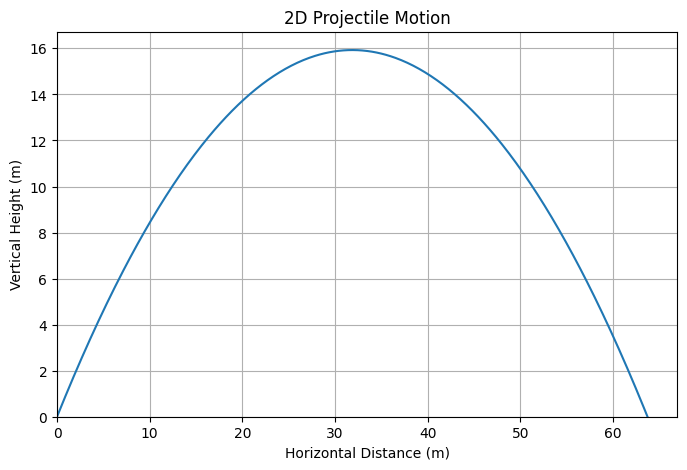

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
v0 = 25.0                # Initial speed (m/s)
theta_deg = 45.0         # Launch angle in degrees
g = 9.81                 # Gravity (m/s^2)

# Convert angle to radians
theta = np.radians(theta_deg)

# Initial velocity components
v0_x = v0 * np.cos(theta)
v0_y = v0 * np.sin(theta)

# Time of flight
t_flight = 2 * v0_y / g

# Time array
t = np.linspace(0, t_flight, num=500)

# Compute x and y positions over time
x = v0_x * t
y = v0_y * t - 0.5 * g * t**2

# Plot the trajectory
plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.title("2D Projectile Motion")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()